# How to Deal with Missing Data

### Contents:
1. **[Summary](#SM)**
    * Import Libraries
    * Read the Data
    * Make the Model 
***
2. **[Missing Value Patterns](#MP)**
    * [Missing Completely ad Random(MCAR)](#MCAR)
    * [Missing at Random(MAR)](#MAR)
    * [Missing Not at Random(MNAR)](#MNAR)
***
3. **[Missingno Package](#MissP)**
    * [Bar Chart](#BC)
    * [Matrix](#Matrix)
    * [Heatmap](#Heatmap)
    * [Dendogram](#Dendogram)
***
4. **[Imputation Techniques](#IT)**
    * [Simple(basic) imputation](#SimpleIm)
        * Mean Imputation
        * Median Imputation
        * Most Frequent Imputation
        * Constant Imputation
        
    * [Advance imputation using fancyimpute package](#Advance)
        * KNN or K-Nearest Neighbour
        * MICE or Multiple Imputation by Chained Equations
        
    * [Evaluation of different imputation techniques](#Eval)
***
5. **[Solution](#Solution)**
        
        


# 1. Summary <a id = "SM"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from fancyimpute import KNN
from fancyimpute import IterativeImputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

import statsmodels.api as sm

import missingno as msno

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline


In [2]:
df = pd.read_csv('pima-indians-diabetes data.csv')

In [3]:
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


# 2. Missing Value Paterns<a id = "MP"></a>

## Missing Completly at Random - MCAR<a id = "MCAR"></a>

This happens if all the variables and observations have the same probability of being missing. In this case, there is no relationship between the missing data and other values observed or unobserved within the given dataset. That is, missing values are completely independent of other data. There is no pattern.

* Example_1: You have a class of students. There are a few students absent on given day. The students are absent just randomly for their specific resons.
<img src="MCAR.png" alt="You have a class of students." title="MCAR" />

* Example_2: If you can predict any reason for missing data whether based on the complete variable Age or the Missing variable IQ score, then the data is not MCAR. It missing randomly.
<img src="MCAR_1.png" alt="" title="MCAR" />

<div class="alert alert-block alert-info">
<b>Missing Completely at Random:</b> Not affested by neither the observed nor the missing data .
</div>

## Missing at Random - MAR<a id = "MAR"></a>

This happens if the probability of the value being missing is related to the value of the variable or other variables in the dataset.In this case, the data is not missing for all the obseravtions. It is missing only sith sub-samples of the data, and there is some pattern in the missing values.

* Example_1: Consider the attendance in a classroom of students during winter where many students are absent due to the bad weather. Although this might be at random, the hidden cause might be that students sitting closer might have contracted a fever. Missing at random means that there might exist a relationship with another variable. Here the attendance is slightly correlated to the season of the year. It's important here to note that missingness is dependent only on the observed values and not the missing values for MAR.
<img src="MAR.png" alt="" title="MAR" />

* Example_2: Notice that IQ score is missing for Age< 44, and thus the missing data depends on the observed data. There is no dependency with the values of the missing column itself.
<img src="MAR_1.png" alt="" title="MAR" />

<div class="alert alert-block alert-info">
<b>Missing at Random:</b> Not caused by the missing data itself but affected by observed data.
</div>

## Missing Not at Random - MNAR<a id = "MNAR"></a>

The probability of being missing is completely differnet for different values of the same variable, and these reason can be unkown to us.If the missing data does not fall under the MCAR or MAR, it can be categorized as MNAR, It can happen due to the relictance of people to provide the required information. Example is that people having less income may refuse to share some information in a survey or questionnaire.
In this case of MNAR, the statistical analysis might result in bias.

* Example_1: In our class of students, it is Sally's birthday. Sally and many of her friends are absent to attend her birthday party. This is not at all random as Sally and only her friends are absent. 
<img src="MNAR.png" alt="You have a class of students." title="MNAR" />

* Example_2: The data are missing on IQ score with only the people which are having a low score.
<img src="MNAR_1.png" alt="." title="MNAR" />

<div class="alert alert-block alert-info">
<b>Missing Not at Random:</b> Caused by the missing data itself.
</div>

# 3.  Missingno package<a id ="MissP"></a>
**A plot says more than 1000 tables.**

* https://pypi.org/project/missingno/
* https://github.com/ResidentMario/missingno

## BarChart<a id= "BC"></a>
* It displays a count of values present per columns ignoring missing values. It is also shows percentages on the y-axis that let us understand the amount of missing values per column.

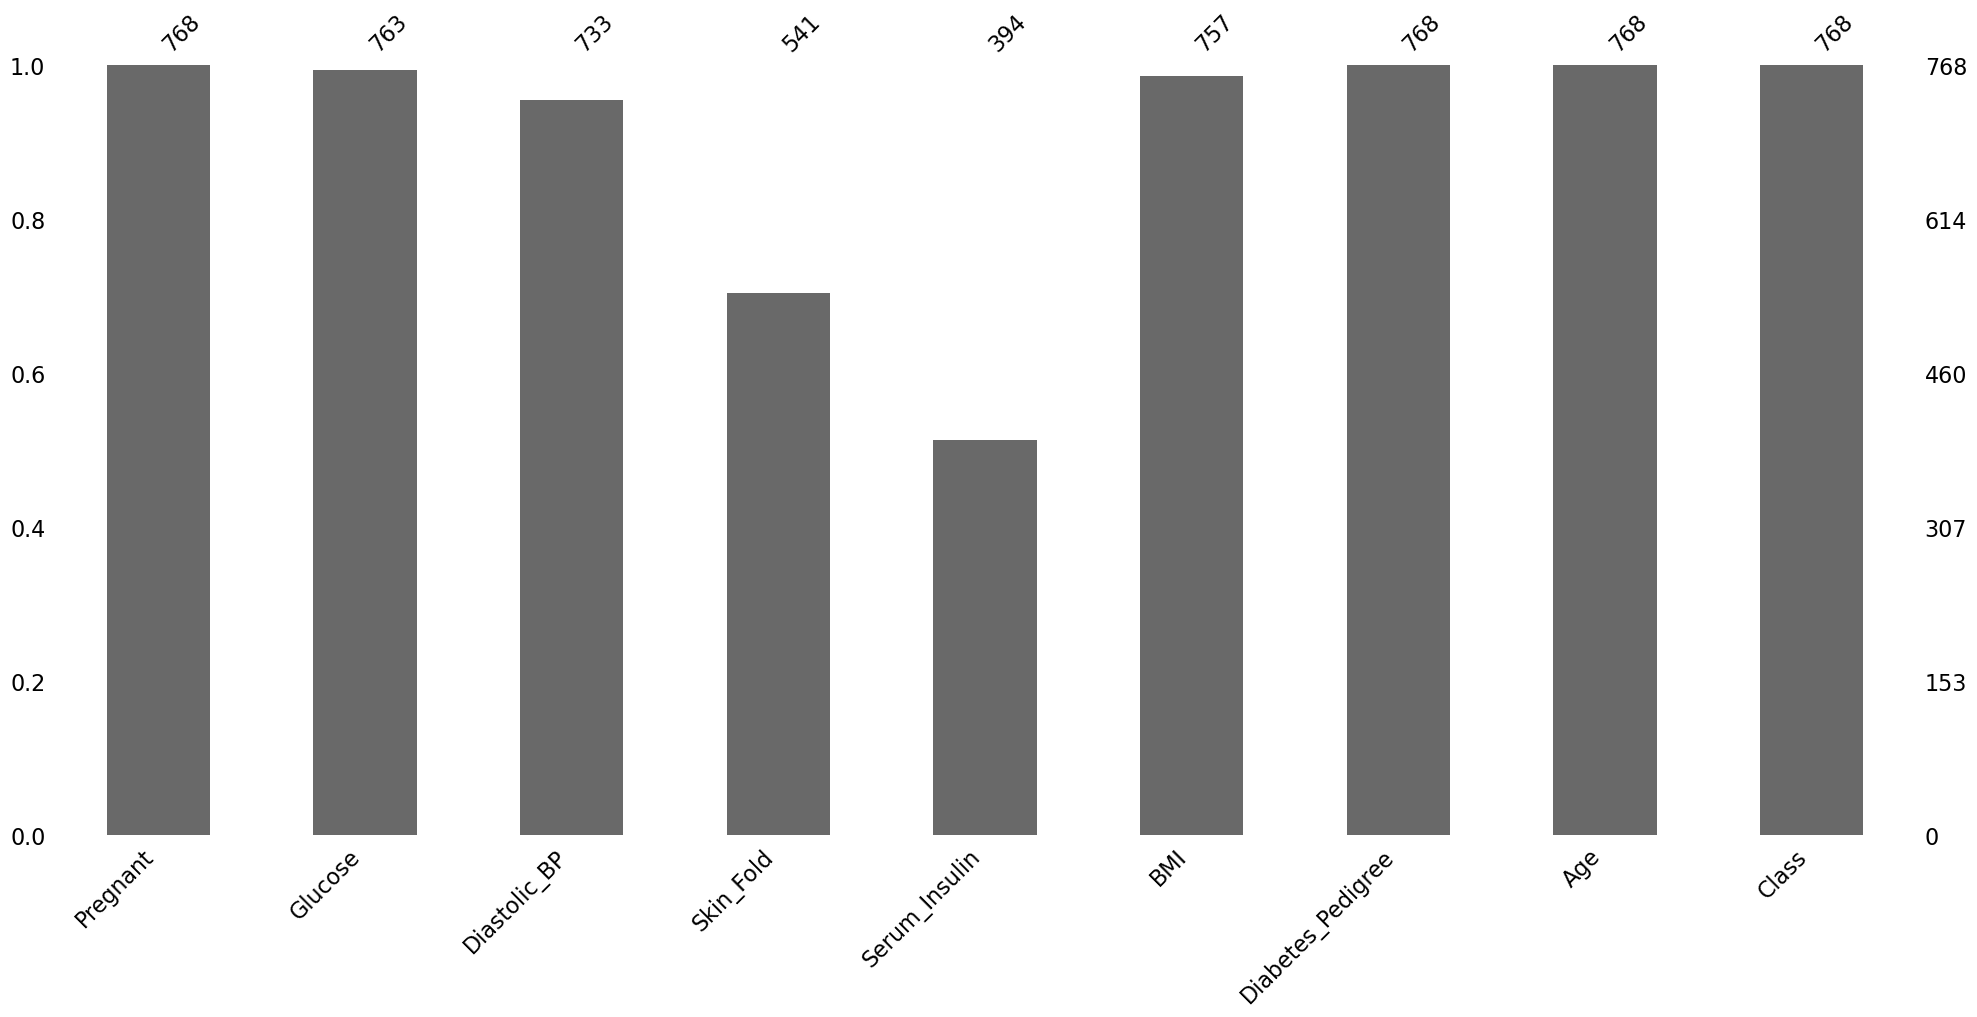

In [5]:
msno.bar(df);

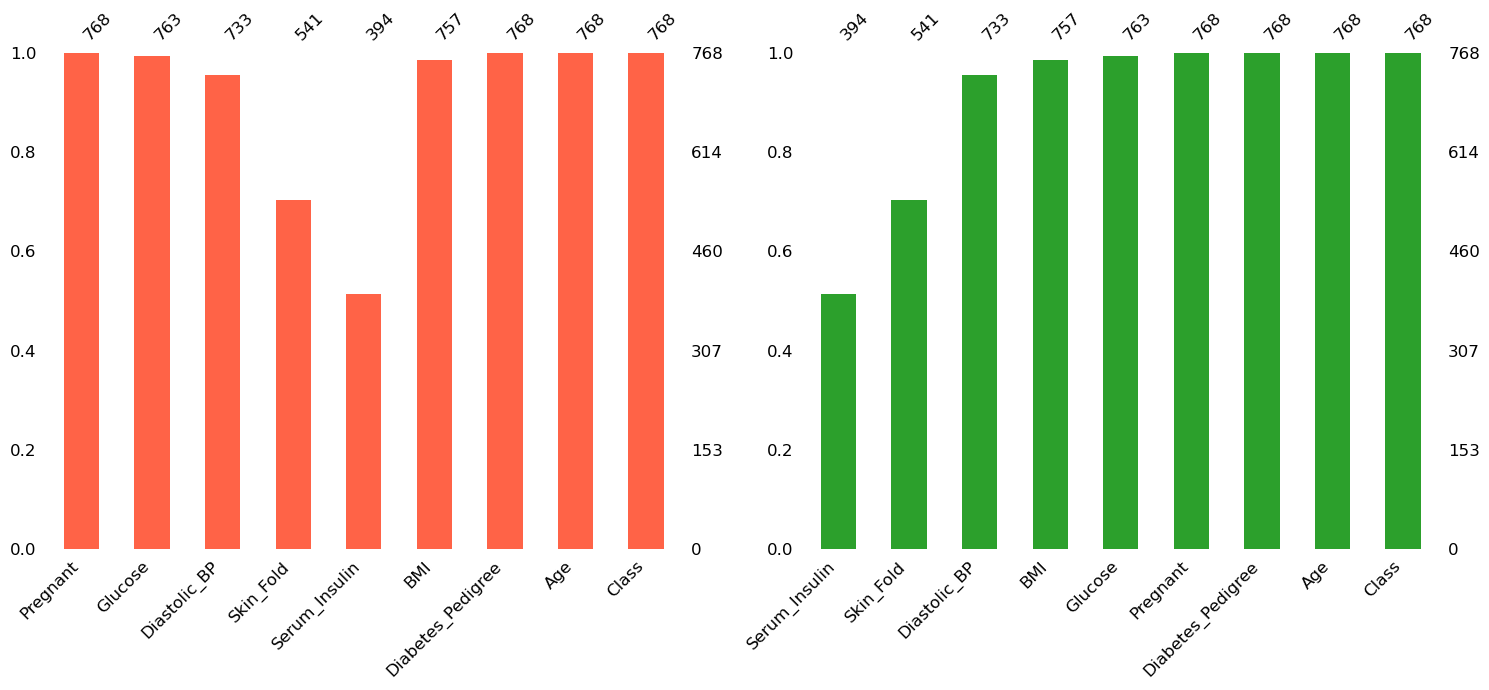

In [6]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,2,1)
msno.bar(df, color="tomato", fontsize=12, ax=ax1);


ax2 = fig.add_subplot(1,2,2)
msno.bar(df,color="tab:green", sort = 'ascending', fontsize=12, ax=ax2);

plt.tight_layout()

In [7]:
df.isnull().sum().sort_values(ascending = False)

Serum_Insulin        374
Skin_Fold            227
Diastolic_BP          35
BMI                   11
Glucose                5
Pregnant               0
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [8]:
df.isnull().mean().sort_values(ascending = False)*100.

Serum_Insulin        48.697917
Skin_Fold            29.557292
Diastolic_BP          4.557292
BMI                   1.432292
Glucose               0.651042
Pregnant              0.000000
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64

## Matrix<a id = "Matirx"></a>
* The nullity matrix chart lets us understand the distribution of data within the whole dataset in all columns at the same time. This can help us better understand the distibution of missing values in data. It also displays sparkline which highlights rows with maximum and minimum nullity in a dataset. 

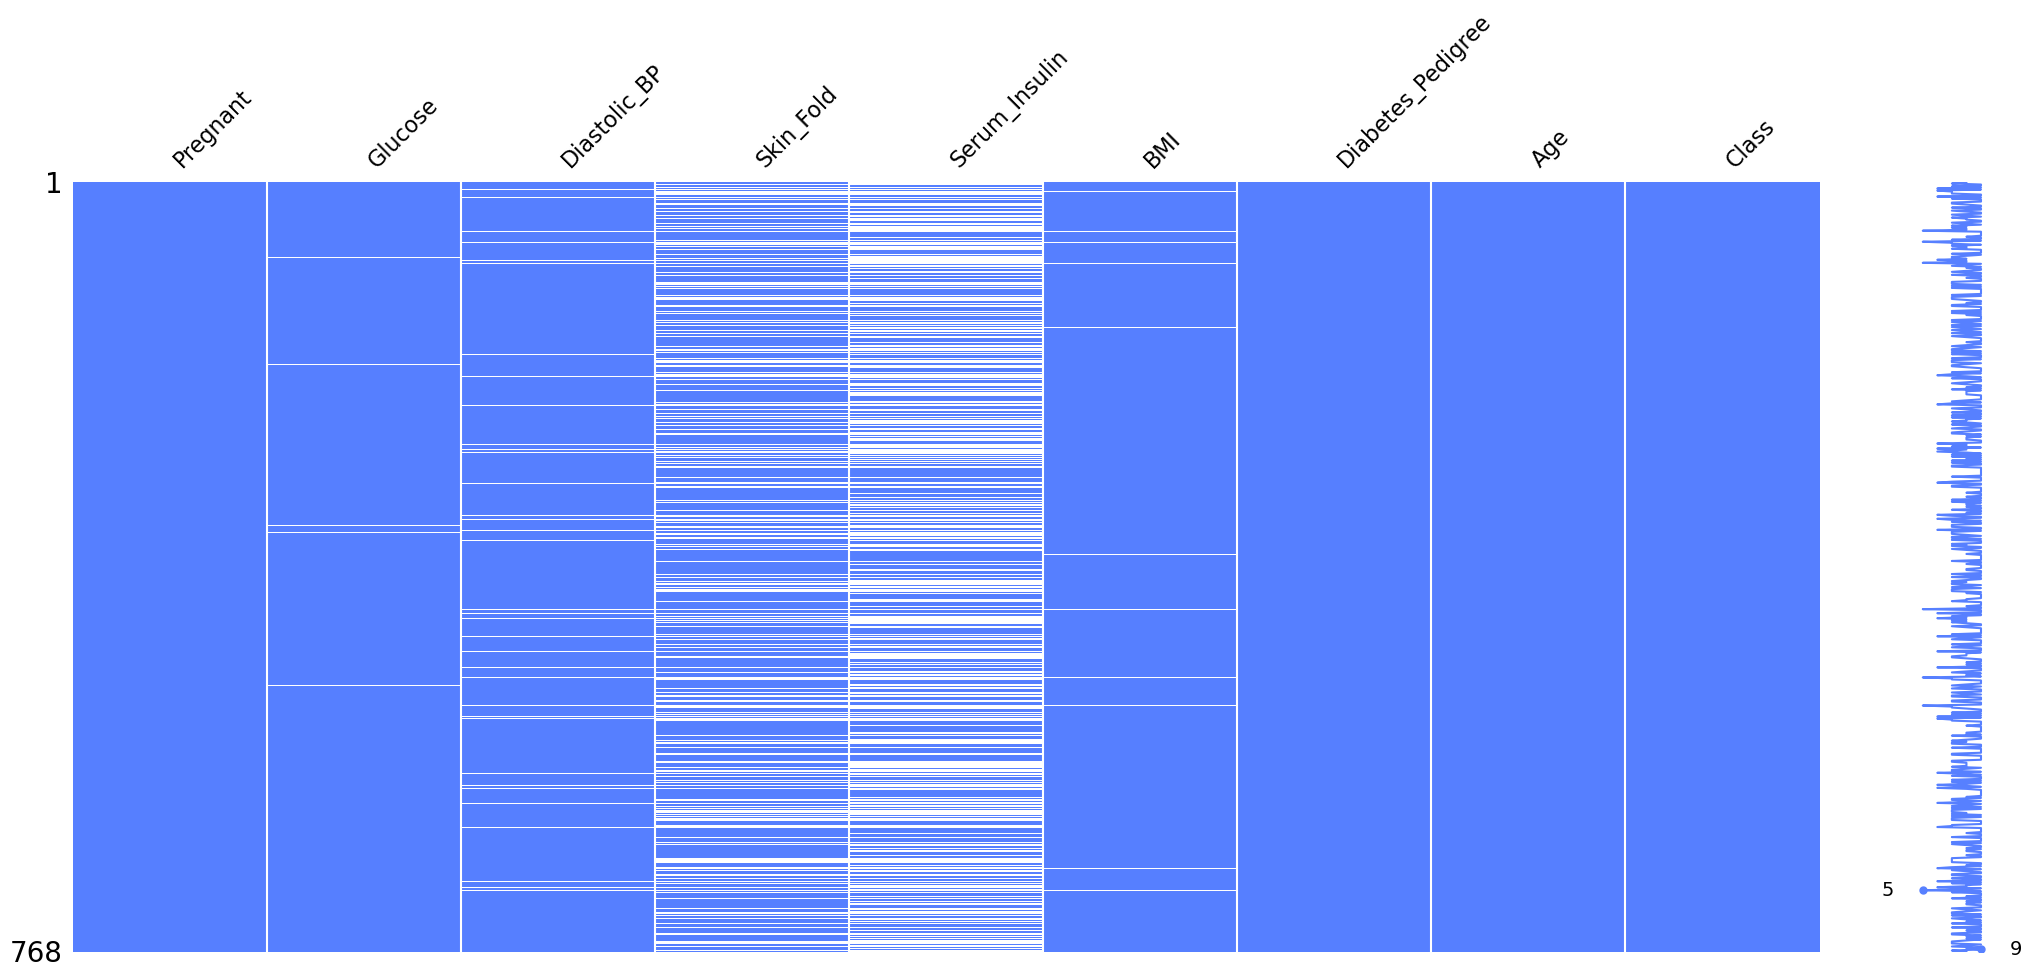

In [9]:
msno.matrix(df, color = (0.34, 0.5, 1));

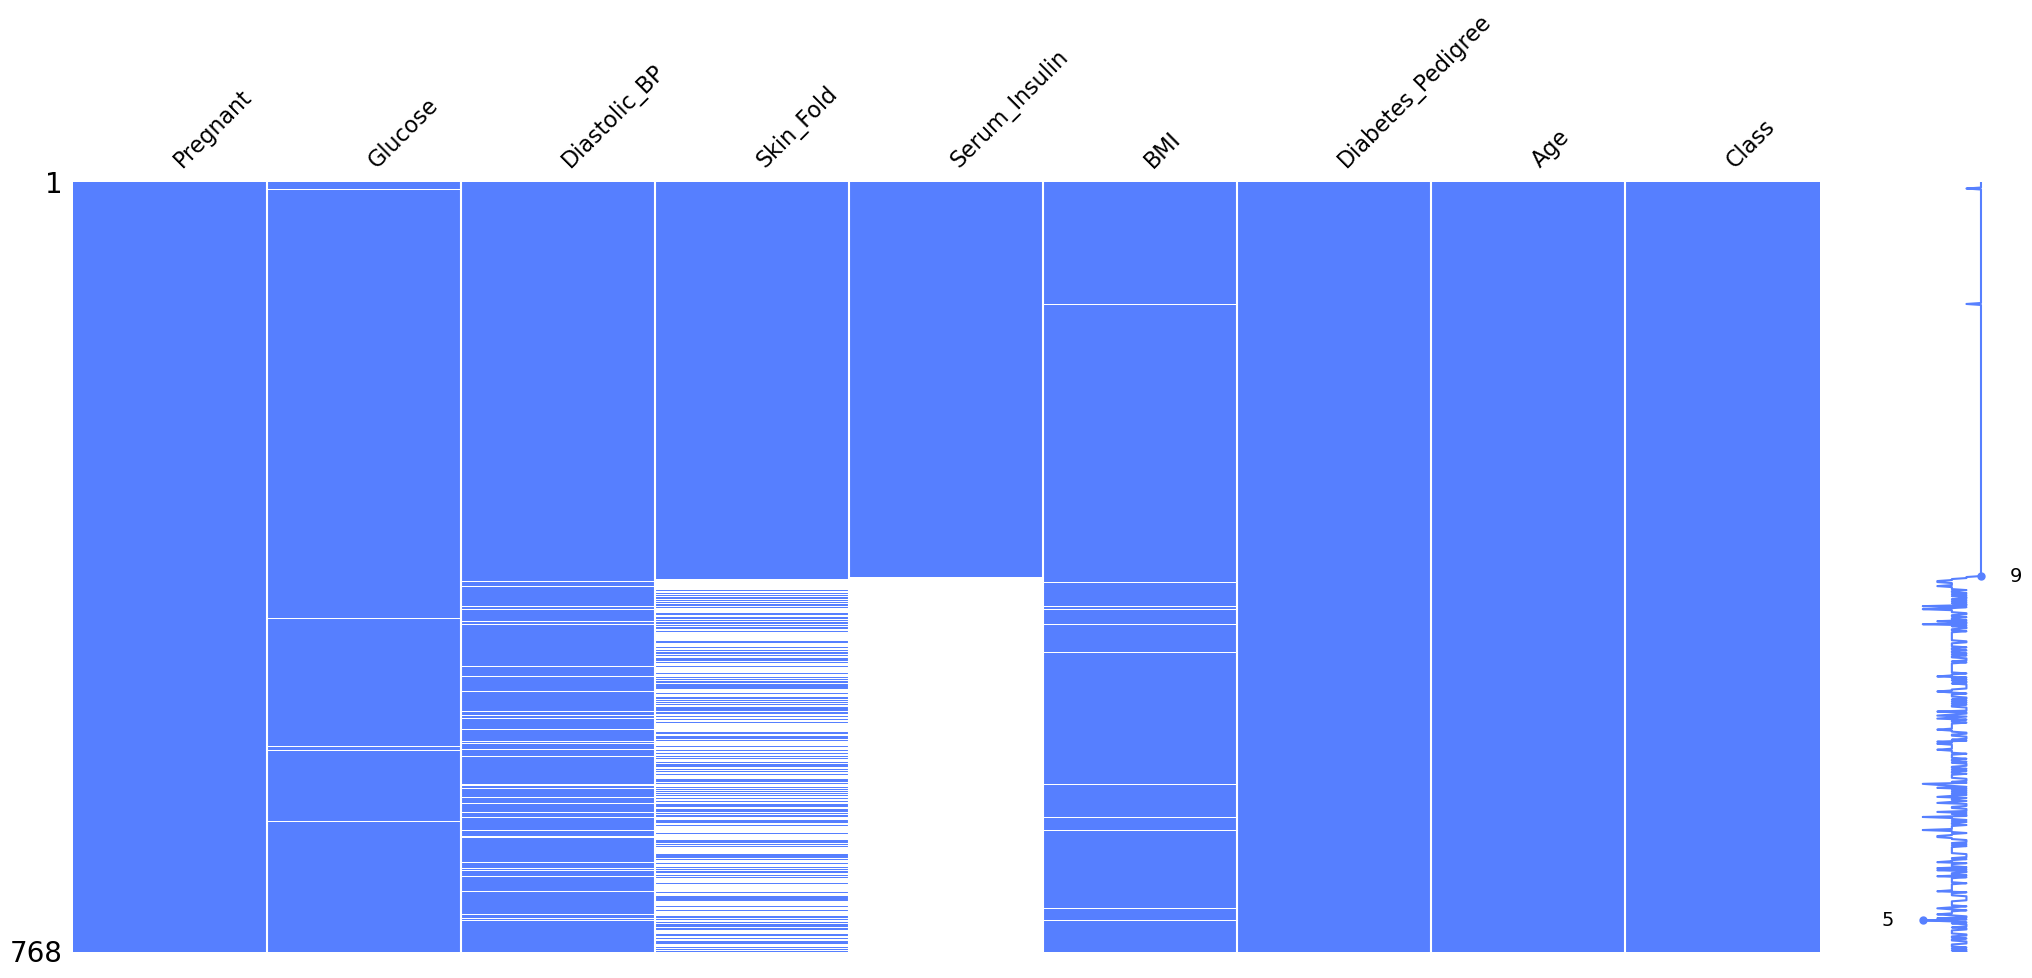

In [10]:
sorted_serum = df.sort_values('Serum_Insulin')
msno.matrix(sorted_serum, color = (0.34, 0.5, 1));

## Heatmap<a id = "Heatmap"></a>
* The chart displays nullity correlation between columns of the dataset. It lets us underestand how the missing value of one columns is related to missing values in other columns. The spark line hepls us better understand where in our dataset a lot of missing values are present as it 'll show high current there.
* The nullity correlation ranges from -1 to 1.
    * **-1** Negative correlation represents that if the value of one variable is present then the value of other variables is definitely absent.
    * **0** No correlation represents that present or absent of one variable do not have any effect on the other one.
    * **1** Positive correlation represents that if the value of one variable is present then the value ot the other is definitely present.

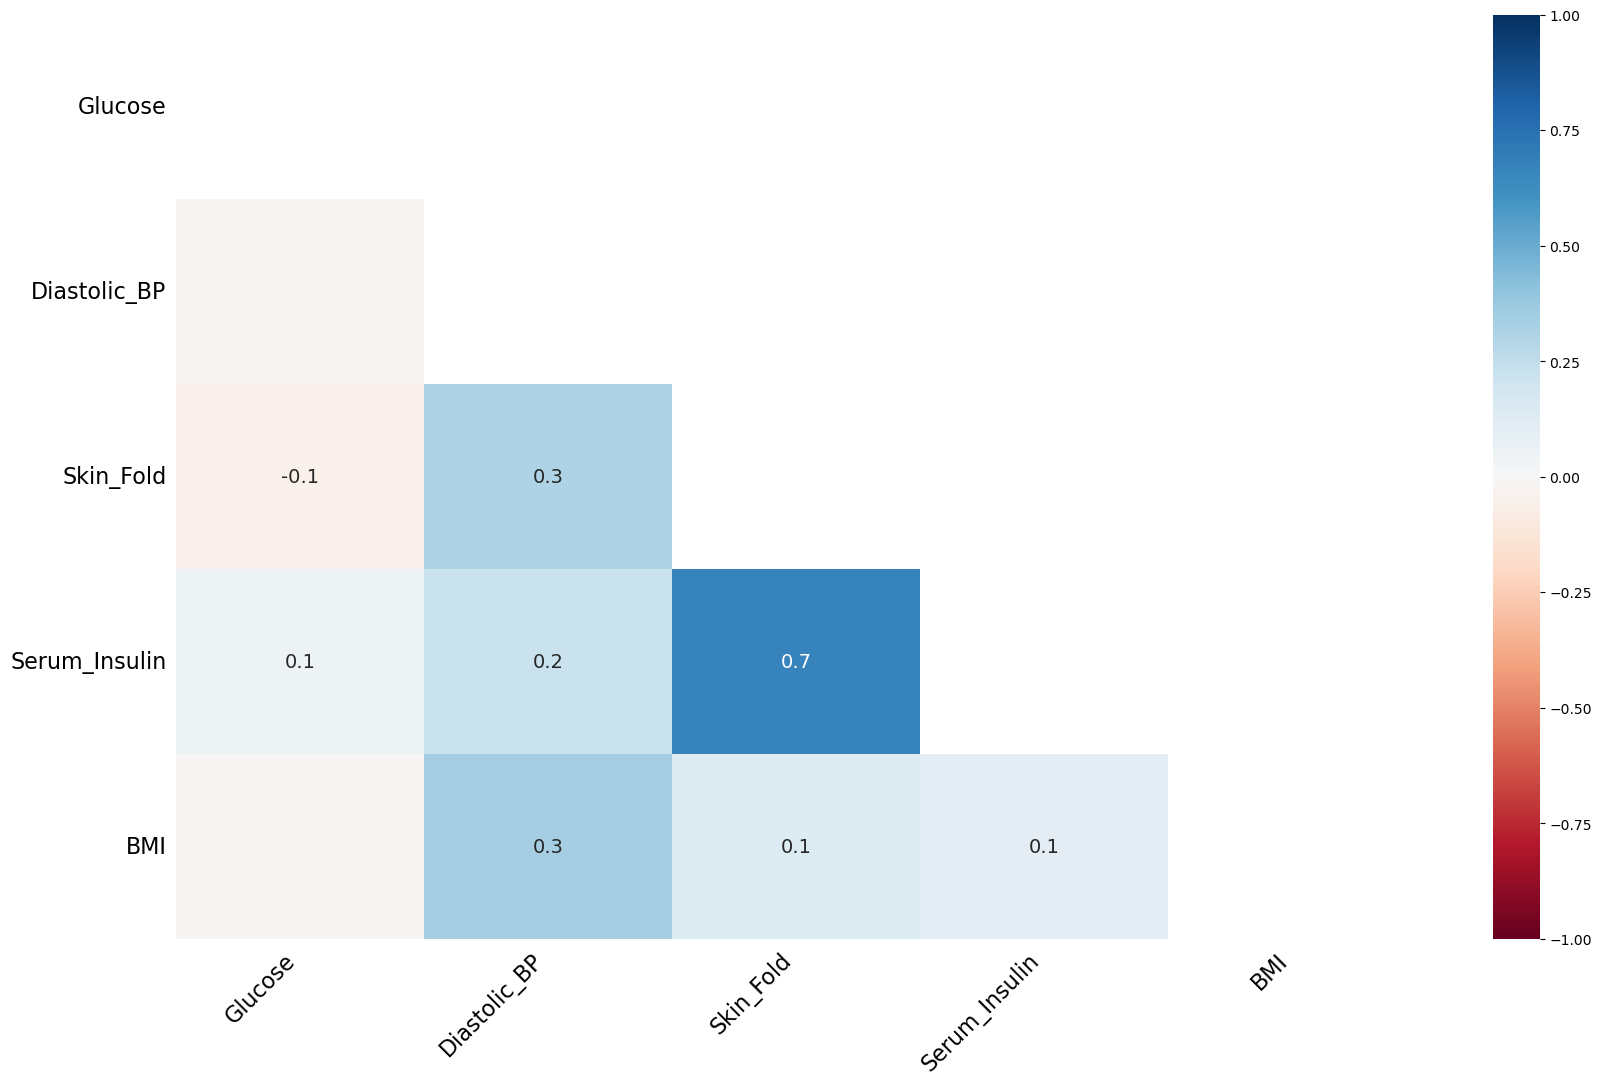

In [11]:
msno.heatmap(df);

* It is high correlation of the missingness between 'Serum_Insulin' and 'Skin_Fold'. So if there are missing values in column 'Serum_Insulin', then there are also missing values in column 'Skin_Fold'.

## Dendogram<a id = "Dendogram"></a>
* The dendogram like heatmap groups columns based on nullity relation between them. It groups columns together where there is more nullity relation. It works almost like hierarchical clustering but uses nullity correlation for clustering which keeps columns with the same missing values distribution in one cluster.

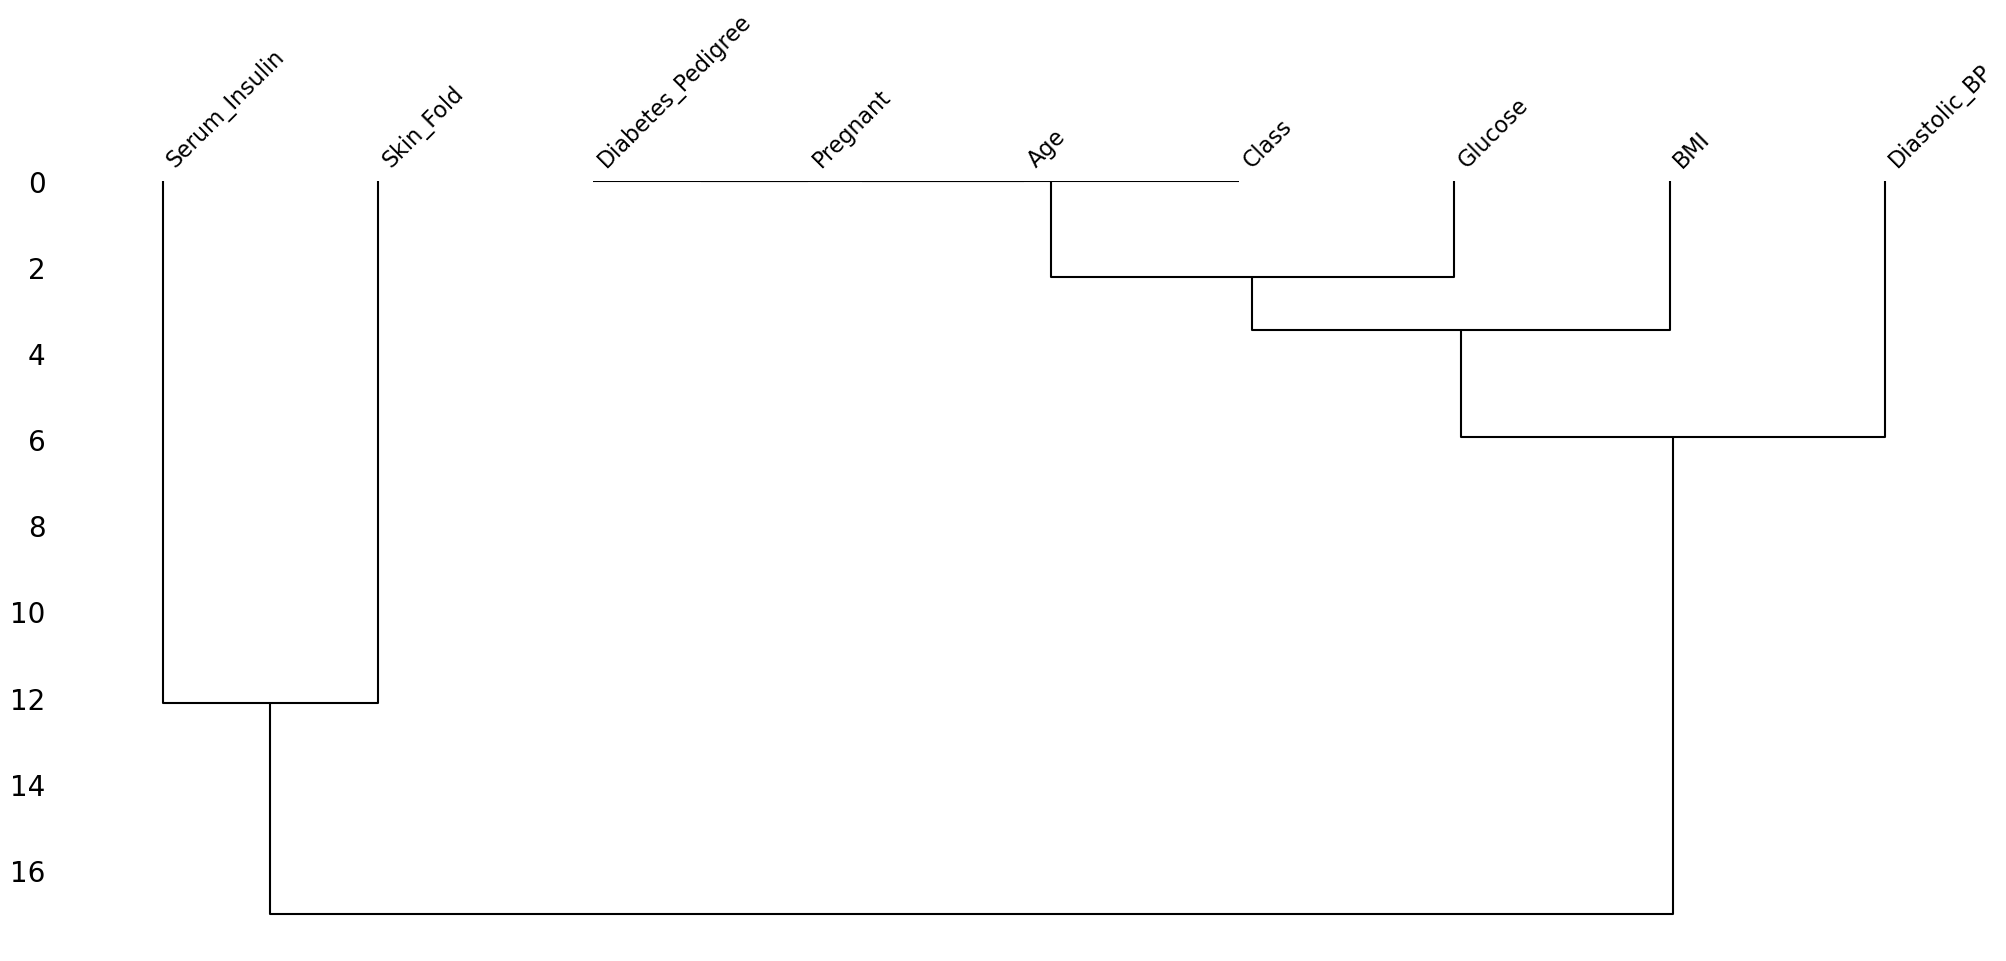

In [12]:
msno.dendrogram(df);

**Conculsion**: 
* Missing values in columns 'Glucose' and 'BMI' are MCAR;
* Missing values in column 'Diastolic_BP' is MAR;
* Missing values in columns 'Skin_fold' and 'Serum_Insulin' are MNAR;

# 4. Imputation Techniques <a id = "IT"></a>

## 4.1 Simple(basic) imputation<a id = "SimpleIm"></a>

In [13]:
# Copy df  to diabtes_mean
diabetes_mean = df.copy(deep = True)

# Initialize SimpleImputer
mean_imputer = SimpleImputer(strategy = 'mean')

# Impute using fit_transform on diabetes_mean
diabetes_mean.iloc[:,:] = mean_imputer.fit_transform(diabetes_mean)

In [14]:
# Copy df  to diabtes_median
diabetes_median = df.copy(deep = True)

# Initialize SimpleImputer
median_imputer = SimpleImputer(strategy = 'median')

# Impute using fit_transform on diabetes_mean
diabetes_median.iloc[:,:] = median_imputer.fit_transform(diabetes_median)

In [15]:
# Copy df  to diabtes_mode
diabetes_mode = df.copy(deep = True)

# Initialize SimpleImputer
mode_imputer = SimpleImputer(strategy = 'most_frequent')

# Impute using fit_transform on diabetes_mean
diabetes_mode.iloc[:,:] = mode_imputer.fit_transform(diabetes_mode)

In [16]:
# Copy df  to diabtes_impute_const
diabetes_impute_const = df.copy(deep = True)

# Initialize SimpleImputer
const_imputer = SimpleImputer(strategy = 'constant', fill_value = 0)

# Impute using fit_transform on diabetes_mean
diabetes_impute_const.iloc[:,:] = const_imputer.fit_transform(diabetes_impute_const)

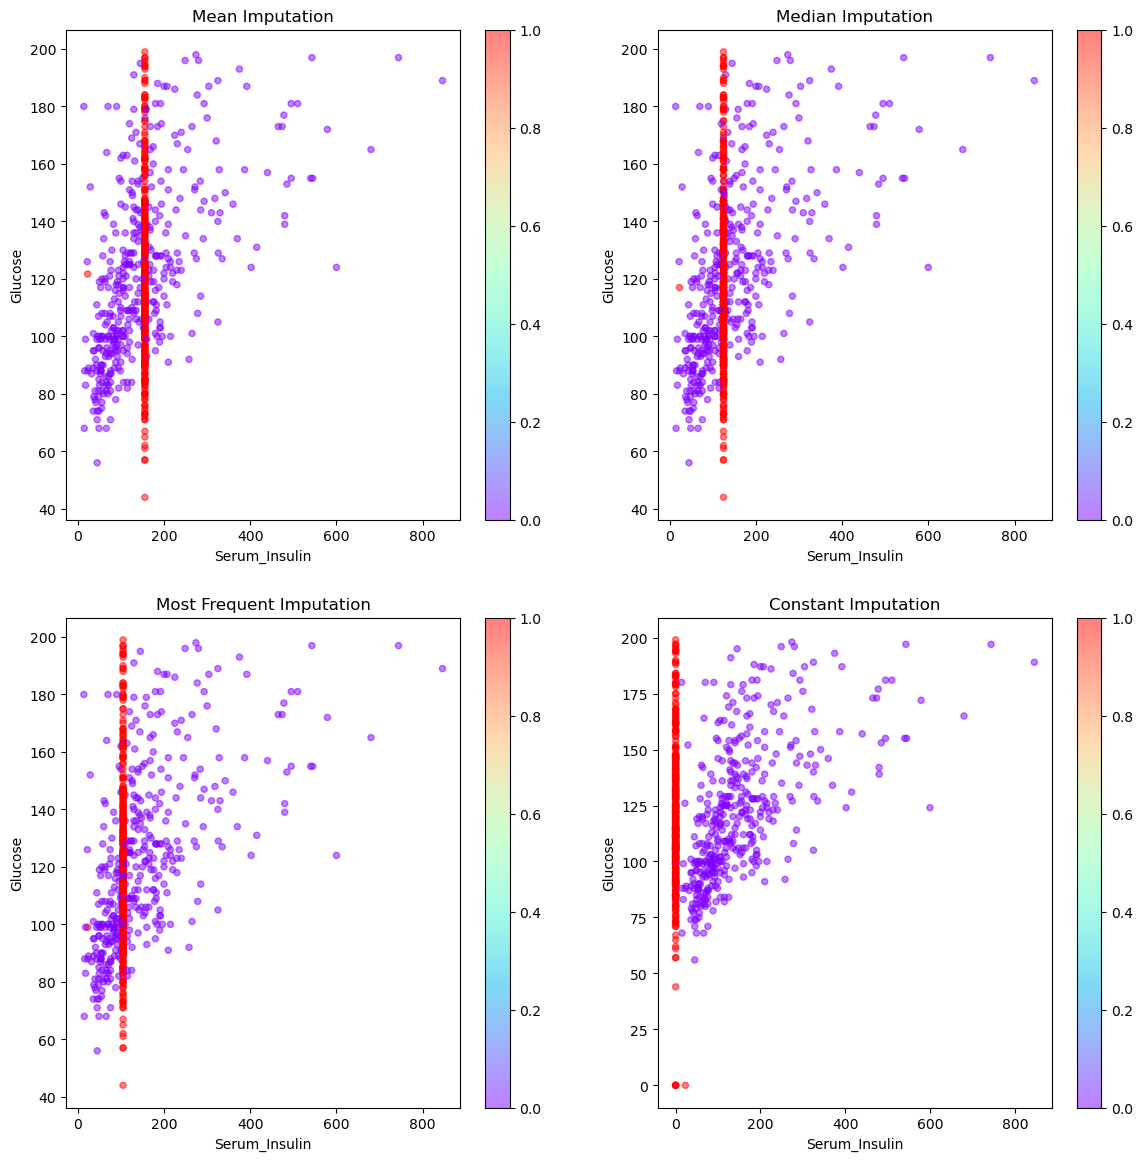

In [17]:
# Scatter plot of imputation
fig, axes = plt.subplots(2,2, figsize = (14,14))
nullity = df['Glucose'].isnull() + df['Serum_Insulin'].isnull()

imputations = {'Mean Imputation' : diabetes_mean,
              'Median Imputation' : diabetes_median,
              'Most Frequent Imputation' : diabetes_mode,
              'Constant Imputation' : diabetes_impute_const}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x = 'Serum_Insulin', y= 'Glucose', kind = 'scatter', alpha = 0.5,
                           c = nullity, cmap = 'rainbow', ax=ax, title =df_key)
    
plt.show()

## 4.2 Advance Imputation Techniques<a id= "Advance"></a>
https://github.com/iskandr/fancyimpute

#### 4.2.1 KNN or K- Nearste Nearest Neighbor


In [18]:
# Initialize KNN
knn_imputer = KNN()

# Copy df to diabetes_knn
diabetes_knn = df.copy(deep = True)

# Impute using fit_transform on diabetes_knn
diabetes_knn.iloc[:,:] = knn_imputer.fit_transform(diabetes_knn)


Imputing row 1/768 with 1 missing, elapsed time: 0.049
Imputing row 101/768 with 2 missing, elapsed time: 0.050
Imputing row 201/768 with 1 missing, elapsed time: 0.051
Imputing row 301/768 with 3 missing, elapsed time: 0.052
Imputing row 401/768 with 2 missing, elapsed time: 0.052
Imputing row 501/768 with 0 missing, elapsed time: 0.053
Imputing row 601/768 with 1 missing, elapsed time: 0.054
Imputing row 701/768 with 0 missing, elapsed time: 0.055


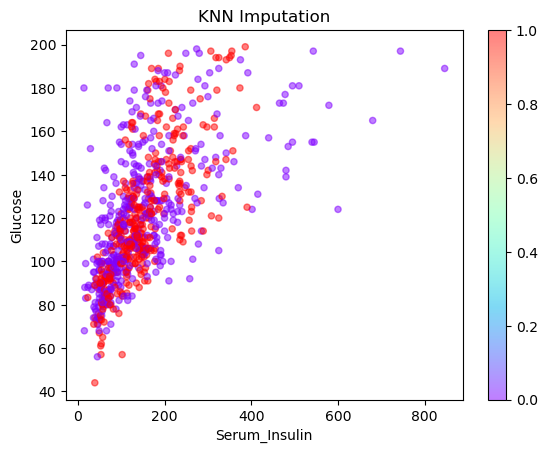

In [19]:
nullity = df['Glucose'].isnull() + df['Serum_Insulin'].isnull()
diabetes_knn.plot(x = 'Serum_Insulin', y = 'Glucose', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'KNN Imputation')
plt.show()

In [20]:
# Initialize KNN
knn_imputer_10 = KNN(k = 10)

# Copy df to diabetes_knn
diabetes_knn_10 = df.copy(deep = True)

# Impute using fit_transform on diabetes_knn
diabetes_knn_10.iloc[:,:] = knn_imputer_10.fit_transform(diabetes_knn_10)

# Number of numbers: 7
knn_imputer_7 = KNN(k = 7)
diabetes_knn_7 = df.copy(deep = True)
diabetes_knn_7.iloc[:,:] = knn_imputer_7.fit_transform(diabetes_knn_7)

# Number of numbers: 3
knn_imputer_3 = KNN(k = 3)
diabetes_knn_3 = df.copy(deep = True)
diabetes_knn_3.iloc[:,:] = knn_imputer_3.fit_transform(diabetes_knn_3)



Imputing row 1/768 with 1 missing, elapsed time: 0.049
Imputing row 101/768 with 2 missing, elapsed time: 0.050
Imputing row 201/768 with 1 missing, elapsed time: 0.051
Imputing row 301/768 with 3 missing, elapsed time: 0.051
Imputing row 401/768 with 2 missing, elapsed time: 0.052
Imputing row 501/768 with 0 missing, elapsed time: 0.053
Imputing row 601/768 with 1 missing, elapsed time: 0.053
Imputing row 701/768 with 0 missing, elapsed time: 0.054
Imputing row 1/768 with 1 missing, elapsed time: 0.047
Imputing row 101/768 with 2 missing, elapsed time: 0.048
Imputing row 201/768 with 1 missing, elapsed time: 0.049
Imputing row 301/768 with 3 missing, elapsed time: 0.049
Imputing row 401/768 with 2 missing, elapsed time: 0.050
Imputing row 501/768 with 0 missing, elapsed time: 0.051
Imputing row 601/768 with 1 missing, elapsed time: 0.051
Imputing row 701/768 with 0 missing, elapsed time: 0.052
Imputing row 1/768 with 1 missing, elapsed time: 0.047
Imputing row 101/768 with 2 missing, 

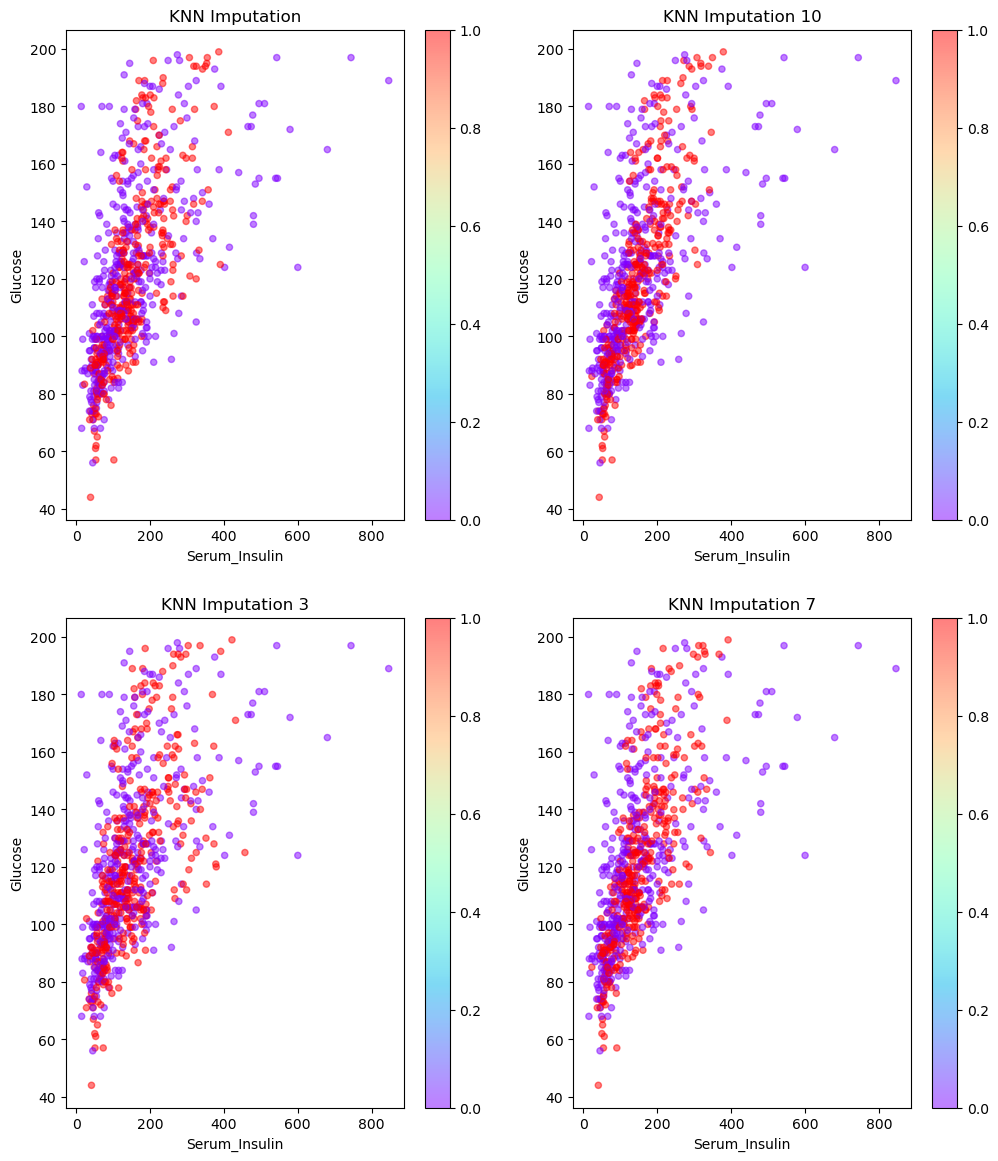

In [21]:
fig, axes = plt.subplots(2,2, figsize = (12,14))
nullity = df['Glucose'].isnull() + df['Serum_Insulin'].isnull()

imputations = {'KNN Imputation' : diabetes_knn,
              'KNN Imputation 10' : diabetes_knn_10,
               'KNN Imputation 3' : diabetes_knn_3,
               'KNN Imputation 7' : diabetes_knn_7,
               
              }

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x = 'Serum_Insulin', y= 'Glucose', kind = 'scatter', alpha = 0.5,
                           c = nullity, cmap = 'rainbow', ax=ax, title =df_key)
    
plt.show()

#### 4.2.2 MICE or Mulptiple Imputation by Chained Equations

<div class="alert alert-block alert-info">
<b>Note 1:</b> **IterativeImputer** started its life as a fancyimpute original, but was then merged into scikit-learn and it was deleted from fancyimpute in favor of the better-tested sklearn version. As a convenience, you can still from fancyimpute import IterativeImputer, but under the hood it's just doing from *sklearn.impute import IterativeImputer*. That means if you update scikit-learn in the future, you may also change the behavior of IterativeImputer.
</div>


<div class="alert alert-block alert-info">
<b>Note 2:</b> 
This estimator is still experimental for now(scikit-learn 1.2.2): the predictions and the API might change without any deprecation cycle. To use it, you need to explicitly import *enable_iterative_imputer*:
    
* from sklearn.experimental import enable_iterative_imputer
* from sklearn.impute import IterativeImputer.
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
</div>


**MICE** is a very robust and complex method of dealing with missing data in datasets. The procedure imputes missing data in a dataset through as iterative series of predictive models. In each iteration, each specified variable in the dataset is imputed using the other variables in the dataset. These iterations should be run untill it appears that convergence has been met.

    * Perform multiple regressions over random sample on the data.
    * Take average of the multiple regression values

In [22]:
# Initialize Iterative Imputer
MICE_Imputer = IterativeImputer()

# Copy df to diabetes_MICE
diabetes_MICE = df.copy(deep = True)

diabetes_MICE.iloc[:,:] = MICE_Imputer.fit_transform(diabetes_MICE)


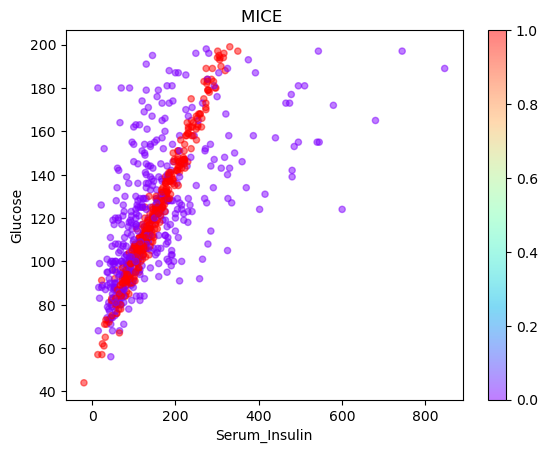

In [23]:
nullity = df['Glucose'].isnull() + df['Serum_Insulin'].isnull()
diabetes_MICE.plot(x = 'Serum_Insulin', y = 'Glucose', kind = 'scatter', alpha = 0.5, c = nullity,
                  cmap = 'rainbow', title = 'MICE ')
plt.show()

### 4.3 Evaluation of different imputation techniques<a id ="Eval"></a>

In [24]:
# Fit a linear model for statistical summary
# Complete case by dropping the rows with missing 
# diabetes complete case
diabetes_cc = df.dropna(how = 'any')

X = sm.add_constant(diabetes_cc.iloc[:,:-1])
y = diabetes_cc['Class']

# The baseline model to compare against other imputations
lm = sm.OLS(y,X).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     25.30
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           2.65e-31
Time:                        11:34:04   Log-Likelihood:                -177.76
No. Observations:                 392   AIC:                             373.5
Df Residuals:                     383   BIC:                             409.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1027      0.14

In [25]:
# Get R-squared 
print("The adjusted R-squared: ",lm.rsquared_adj.round(4))
print("*************************")
# Get Coefficient
print("The coefficient: \n",lm.params.round(4))

The adjusted R-squared:  0.3321
*************************
The coefficient: 
 const               -1.1027
Pregnant             0.0130
Glucose              0.0064
Diastolic_BP         0.0001
Skin_Fold            0.0017
Serum_Insulin       -0.0001
BMI                  0.0093
Diabetes_Pedigree    0.1572
Age                  0.0059
dtype: float64


In [26]:
# Fit linear model on different imputed DataFrames

# Mean Imputation
X = sm.add_constant(diabetes_mean.iloc[:,:-1])
y = df['Class']
lm_mean = sm.OLS(y,X).fit()


# KNN Imputation
X = sm.add_constant(diabetes_knn.iloc[:,:-1])
y = df['Class']
lm_knn = sm.OLS(y,X).fit()

X = sm.add_constant(diabetes_knn_10.iloc[:,:-1])
y = df['Class']
lm_knn_10 = sm.OLS(y,X).fit()

X = sm.add_constant(diabetes_knn_3.iloc[:,:-1])
y = df['Class']
lm_knn_3 = sm.OLS(y,X).fit()

X = sm.add_constant(diabetes_knn_7.iloc[:,:-1])
y = df['Class']
lm_knn_7 = sm.OLS(y,X).fit()



# MICE Imputation
X = sm.add_constant(diabetes_MICE.iloc[:,:-1])
y = df['Class']
lm_MICE = sm.OLS(y,X).fit()

In [27]:
# Comparing R-squared of different imputations

pd.DataFrame({
    'Complete' : lm.rsquared_adj,
    'Mean Imp' : lm_mean.rsquared_adj,
    'KNN Imp' : lm_knn.rsquared_adj,
    'KNN(10) Imp' : lm_knn_10.rsquared_adj,
    'KNN(3) Imp': lm_knn_3.rsquared_adj,
    'KNN(7) Imp' :lm_knn_7.rsquared_adj ,
    'MICE Imp' : lm_MICE.rsquared_adj
}, index = ['R_squared_adj'])

,Complete,Mean Imp,KNN Imp,KNN(10) Imp,KNN(3) Imp,KNN(7) Imp,MICE Imp
R_squared_adj,0.332108,0.313781,0.316505,0.316609,0.316689,0.316678,0.316534


* KNN_3 has the best adjusted R-squared (adj.$R^{2}$)

In [28]:
# Find the best imputation technique
rsquared_df = {
    'Mean Imputation' : lm_mean.rsquared_adj,
    'KNN Imputation' : lm_knn.rsquared_adj,
    'KNN(10) Imputation' : lm_knn_10.rsquared_adj,
    'KNN(3) Imputation': lm_knn_3.rsquared_adj,
    'KNN(7) Imputation' :lm_knn_7.rsquared_adj ,
    'MICE Imputation' : lm_MICE.rsquared_adj}

best_imputation = max(rsquared_df, key =rsquared_df.get )
print('The best imputation technique is: ', best_imputation)

The best imputation technique is:  KNN(3) Imputation


In [29]:
# Comparing coefficints of diffrent imputations
pd.DataFrame({
    'Complete' : lm.params,
    'Mean Imp' : lm_mean.params,
    'KNN Imp' : lm_knn.params,
    'KNN(10) Imp' : lm_knn_10.params,
    'KNN(3) Imp': lm_knn_3.params,
    'KNN(7) Imp' :lm_knn_7.params,
    'MICE Imp' : lm_MICE.params
})

,Complete,Mean Imp,KNN Imp,KNN(10) Imp,KNN(3) Imp,KNN(7) Imp,MICE Imp
const,-1.102677,-1.024005,-1.027586,-1.023321,-1.032150,-1.028771,-1.035018
Pregnant,0.012953,0.020693,0.020074,0.020200,0.019863,0.020089,0.020380
Glucose,0.006409,0.006467,0.006593,0.006582,0.006687,0.006621,0.006638
Diastolic_BP,0.000055,-0.001137,-0.001191,-0.001306,-0.001240,-0.001218,-0.001220
Skin_Fold,0.001678,0.000193,0.001744,0.001765,0.001572,0.001837,0.000569
Serum_Insulin,-0.000123,-0.000090,-0.000129,-0.000118,-0.000179,-0.000141,-0.000116
BMI,0.009325,0.014376,0.013103,0.013194,0.013291,0.013076,0.014147
Diabetes_Pedigree,0.157192,0.129282,0.127763,0.127526,0.127996,0.127735,0.127947
Age,0.005878,0.002092,0.002036,0.002026,0.002164,0.002026,0.002051


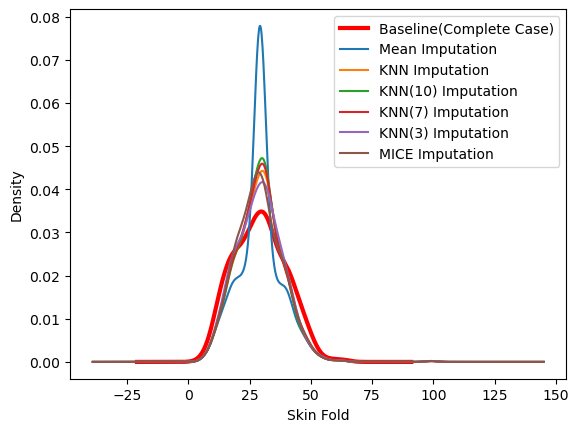

In [30]:
# Comparing density plots
# We can compare the density plots of the imputations to check 
# which imputation most resembles the original dataset and does not introduce a bias.

diabetes_cc['Skin_Fold'].plot(kind ='kde', c= 'red', linewidth = 3)
diabetes_mean['Skin_Fold'].plot(kind ='kde')
diabetes_knn['Skin_Fold'].plot(kind ='kde')
diabetes_knn_10['Skin_Fold'].plot(kind ='kde')
diabetes_knn_7['Skin_Fold'].plot(kind ='kde')
diabetes_knn_3['Skin_Fold'].plot(kind ='kde')
diabetes_MICE['Skin_Fold'].plot(kind ='kde')

labels = ['Baseline(Complete Case)', 'Mean Imputation',
         'KNN Imputation', 'KNN(10) Imputation', 'KNN(7) Imputation', 'KNN(3) Imputation',
         'MICE Imputation']

plt.legend(labels)
plt.xlabel('Skin Fold')

plt.show()

The mean imputation is completely out of shape as compared to the other imputatiopns.\
The KNN and MICE imputations are much more identical to the base DataFrame with the peak\
of MICE imputation being slightly shifted.

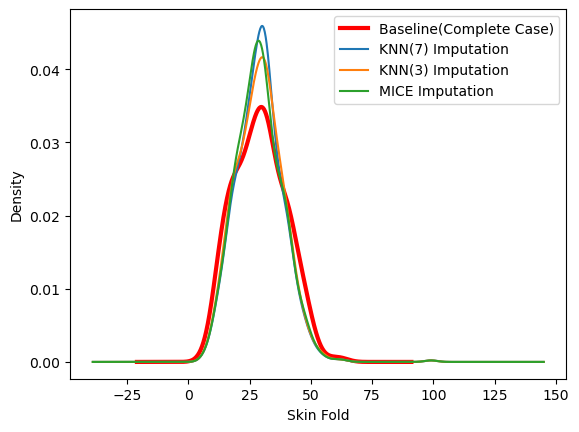

In [31]:
# Comparing density plots

diabetes_cc['Skin_Fold'].plot(kind ='kde', c= 'red', linewidth = 3)
#diabetes_mean['Skin_Fold'].plot(kind ='kde')
#diabetes_knn['Skin_Fold'].plot(kind ='kde')
#diabetes_knn_10['Skin_Fold'].plot(kind ='kde')
diabetes_knn_7['Skin_Fold'].plot(kind ='kde')
diabetes_knn_3['Skin_Fold'].plot(kind ='kde')
diabetes_MICE['Skin_Fold'].plot(kind ='kde')

labels = ['Baseline(Complete Case)', 'KNN(7) Imputation','KNN(3) Imputation' ,'MICE Imputation']

plt.legend(labels)
plt.xlabel('Skin Fold')

plt.show()

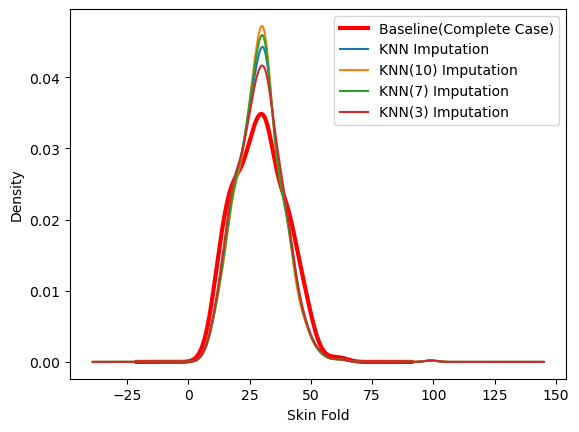

In [32]:
# Comparing density plots
diabetes_cc['Skin_Fold'].plot(kind ='kde', c= 'red', linewidth = 3)

diabetes_knn['Skin_Fold'].plot(kind ='kde')
diabetes_knn_10['Skin_Fold'].plot(kind ='kde')
diabetes_knn_7['Skin_Fold'].plot(kind ='kde')
diabetes_knn_3['Skin_Fold'].plot(kind ='kde')
#diabetes_MICE['Skin_Fold'].plot(kind ='kde')

labels = ['Baseline(Complete Case)',
         'KNN Imputation', 'KNN(10) Imputation', 'KNN(7) Imputation', 'KNN(3) Imputation'
        ]

plt.legend(labels)
plt.xlabel('Skin Fold')

plt.show()

# 5. Solution<a id = "Solution"></a>

We will make two dataset. The first one is diab (only imputation) and another is df_drop (drop MCAR)

In [33]:
# We save the shape of diabetes dataset by imputing
diab = diabetes_knn_3.copy(deep= True)
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            768 non-null    float64
 2   Diastolic_BP       768 non-null    float64
 3   Skin_Fold          768 non-null    float64
 4   Serum_Insulin      768 non-null    float64
 5   BMI                768 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    float64
 8   Class              768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [34]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [36]:
df.isnull().mean() * 100

Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64

In [37]:
df.shape

(768, 9)

* Missing values in columns 'Glucose' and 'BMI' are MCAR => We should delete missing values because they are MCAR and the number of missing values is very small ('Glucose':0.65%, 'BMI':1.43% )

In [38]:
df_drop = df.copy(deep = True)
df_drop.dropna(subset = ['Glucose', 'BMI'], how = 'any', inplace= True)

In [39]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           752 non-null    float64
 1   Glucose            752 non-null    float64
 2   Diastolic_BP       724 non-null    float64
 3   Skin_Fold          534 non-null    float64
 4   Serum_Insulin      392 non-null    float64
 5   BMI                752 non-null    float64
 6   Diabetes_Pedigree  752 non-null    float64
 7   Age                752 non-null    int64  
 8   Class              752 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 58.8 KB


In [48]:
df_drop.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Pregnant,752.0,3.851,3.375,0.000,1.000,3.000,6.000,17.00
Glucose,752.0,121.941,30.601,44.000,99.750,117.000,141.000,199.00
Diastolic_BP,724.0,72.401,12.380,24.000,64.000,72.000,80.000,122.00
Skin_Fold,534.0,29.172,10.508,7.000,22.000,29.000,36.000,99.00
Serum_Insulin,392.0,156.056,118.842,14.000,76.750,125.500,190.000,846.00
BMI,752.0,32.455,6.929,18.200,27.500,32.300,36.600,67.10
Diabetes_Pedigree,752.0,0.473,0.330,0.078,0.244,0.377,0.628,2.42
Age,752.0,33.312,11.709,21.000,24.000,29.000,41.000,81.00
Class,752.0,0.351,0.478,0.000,0.000,0.000,1.000,1.00


On set df_drop we will do some imputation as we do in above case.